There seems to be a pattern in the provided TOWs where each measurement is 100-200kgs under a full integer ton value
We should investigate this more


In [1]:
import sys
from pathlib import Path
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from utils.data_loader import DataLoader

from preprocessing.runway import RunwayInfoPreprocessor
from preprocessing.aircraft_performance import AircraftPerformancePreprocessor
from preprocessing.fuel_price_preprocessor import FuelPricePreprocessor
from preprocessing.pax_flow_preprocessor import PaxFlowPreprocessor
from preprocessing.weather import WeatherDataPreprocessor
from preprocessing.derived_features import DerivedFeaturePreprocessor
from preprocessing.clean_dataset import CleanDatasetPreprocessor



In [9]:
preprocs = [RunwayInfoPreprocessor(), AircraftPerformancePreprocessor(), FuelPricePreprocessor(), PaxFlowPreprocessor(), WeatherDataPreprocessor(), DerivedFeaturePreprocessor(), CleanDatasetPreprocessor()]

loader = DataLoader(data_path=Path("../data"))
challenge, submission, final_submission = loader.load()
before_tows = challenge.df.tow
print(sum(before_tows == before_tows.astype(int)) / len(before_tows))

for p in  preprocs:
    print(f"Before {p}")
    print(sum(challenge.df.tow == challenge.df.tow.astype(int)) / len(challenge.df.tow))
    challenge = p.apply(challenge)
    
after_tows = challenge.df.tow
print(sum(after_tows == after_tows.astype(int)) / len(after_tows))

0.8667065929926588
Before <preprocessing.runway.RunwayInfoPreprocessor object at 0x7f6e9f5b22d0>
0.8667065929926588
Before <preprocessing.aircraft_performance.AircraftPerformancePreprocessor object at 0x7f6e97c6f710>
0.8667065929926588
Before <preprocessing.fuel_price_preprocessor.FuelPricePreprocessor object at 0x7f6e97c6f290>
0.8667065929926588
Before <preprocessing.pax_flow_preprocessor.PaxFlowPreprocessor object at 0x7f6e97c6f0d0>
0.8121716087175035
Before <preprocessing.weather.WeatherDataPreprocessor object at 0x7f6e97c6e590>
0.8121716087175035
Before <preprocessing.derived_features.DerivedFeaturePreprocessor object at 0x7f6e97c6ed90>
0.8121716087175035
Before <preprocessing.clean_dataset.CleanDatasetPreprocessor object at 0x7f6e97c6fc10>
0.8121716087175035
0.8121716087175035


In [8]:
before_tows

0          54748.000000
1         185441.000000
2         230396.000000
3         157615.000000
4          70318.447226
              ...      
369008    163438.000000
369009     78707.000000
369010     62942.750000
369011     72611.161024
369012    195373.000000
Name: tow, Length: 369013, dtype: float64

In [32]:
tows = challenge.df.tow

In [33]:
# int percentage
sum(tows == tows.astype(int)) / len(tows)

0.8121716087175035

In [34]:
nearest_ton = np.round(tows / 1000) * 1000

(array([2.2000e+01, 4.3600e+02, 2.0000e+01, 3.6000e+01, 3.0000e+01,
        6.5300e+02, 6.8000e+01, 1.0200e+02, 5.3000e+02, 5.8000e+01,
        3.8000e+01, 2.2100e+02, 4.5000e+01, 1.6300e+02, 4.8600e+02,
        9.2500e+02, 1.1300e+02, 3.9400e+02, 2.5400e+02, 1.5500e+03,
        1.1980e+03, 1.3340e+03, 5.1500e+02, 2.0220e+03, 2.0580e+03,
        3.3410e+03, 2.8680e+03, 5.9570e+03, 2.7820e+03, 6.0150e+03,
        9.9080e+03, 2.0869e+04, 1.0742e+04, 1.1109e+04, 8.3720e+03,
        1.9829e+04, 1.5517e+04, 7.0620e+03, 8.0290e+03, 1.1571e+04,
        2.4090e+03, 5.6310e+03, 7.8100e+02, 2.6340e+03, 2.6640e+03,
        2.0000e+00, 1.4000e+01, 9.0800e+02, 1.0000e+00, 0.0000e+00,
        1.0590e+03, 8.0000e+00, 0.0000e+00, 0.0000e+00, 1.0910e+03,
        6.0000e+00, 2.8200e+02, 3.5000e+02, 2.5200e+02, 2.0000e+00,
        4.6200e+02, 5.9300e+02, 6.3100e+02, 1.0000e+00, 3.0000e+00,
        5.8900e+02, 3.3000e+01, 5.0000e+00, 3.2460e+03, 3.0000e+00,
        7.0000e+00, 5.6600e+02, 2.5600e+02, 1.28

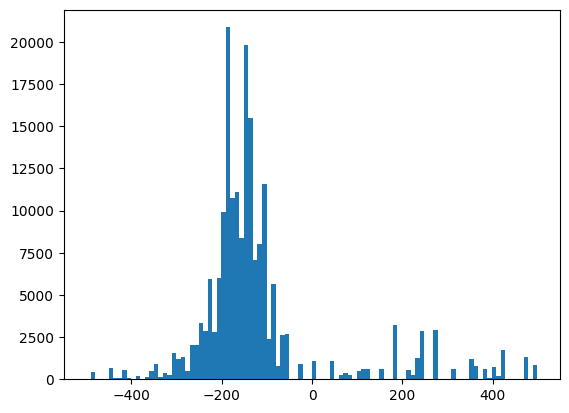

In [35]:
plt.hist(tows - nearest_ton, bins=100)

In [36]:
np.median(tows - nearest_ton)

-149.0

In [37]:
np.mean(tows - nearest_ton)

-114.1386221707762

In [38]:
vals, bins = np.histogram(tows - nearest_ton, bins=1000)
bins[vals.argmax()]

-149.702

In [39]:
challenge.df["dist_next_ton"] = challenge.df["tow"] - (np.round(challenge.df["tow"] / 1000) * 1000)

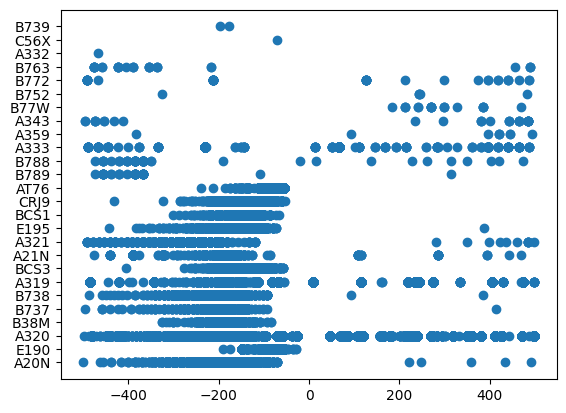

In [40]:
plt.scatter(challenge.df["dist_next_ton"], challenge.df["aircraft_type"])

In [41]:
challenge.df.columns

Index(['flight_id', 'date', 'callsign', 'adep', 'name_adep',
       'country_code_adep', 'ades', 'name_ades', 'country_code_ades',
       'actual_offblock_time',
       ...
       'ades_peak_wind_gust', 'ades_peak_wind_drct', 'ades_peak_wind_time',
       'ades_feel', 'ades_snowdepth', 'day', 'day_of_week', 'quarter',
       'is_week_day', 'dist_next_ton'],
      dtype='object', length=164)

<Axes: >

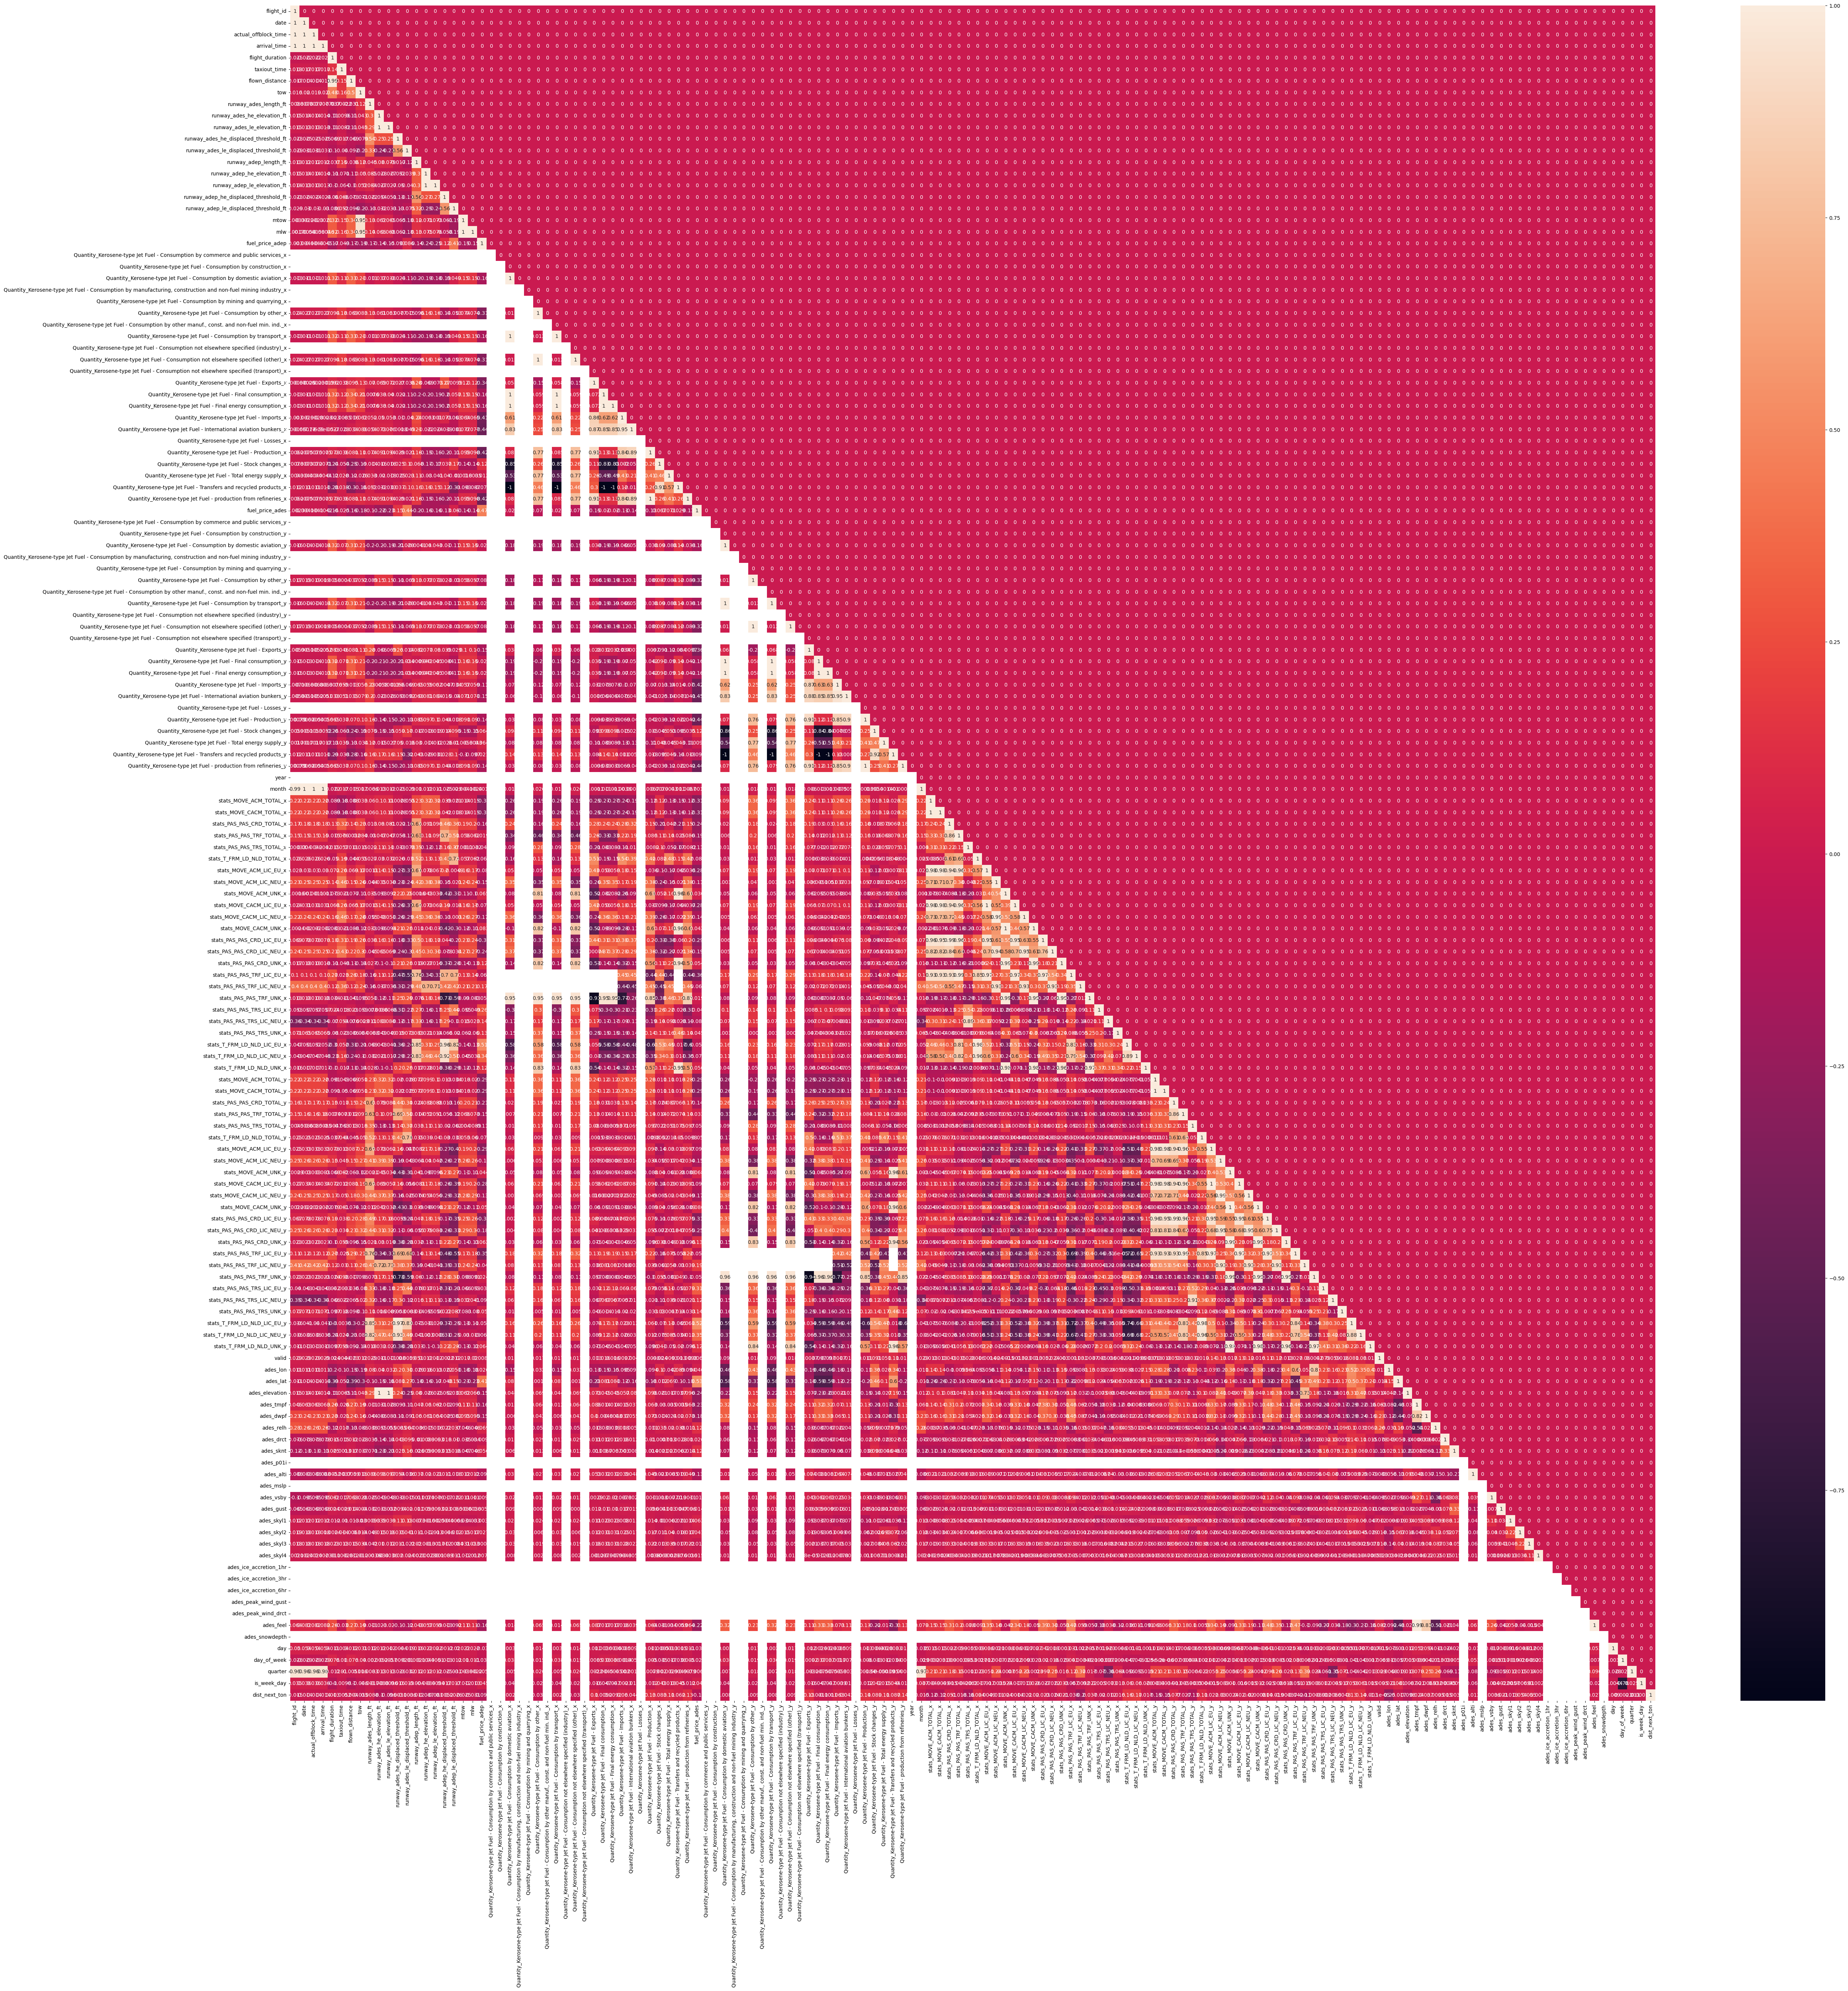

In [47]:
import seaborn as sns

plt.figure(figsize=(60, 60))
corr = challenge.df.corr(numeric_only=True)

sns.heatmap(np.tril(corr), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

In [48]:
# Print pairs with abs(correlation) >= 0.5
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) >= 0.5:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

print("Pairs with absolute correlation >= 0.5:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

Pairs with absolute correlation >= 0.5:
flight_id - date: 1.00
flight_id - actual_offblock_time: 1.00
flight_id - arrival_time: 1.00
flight_id - month: 0.99
flight_id - quarter: 0.96
date - actual_offblock_time: 1.00
date - arrival_time: 1.00
date - month: 1.00
date - quarter: 0.96
actual_offblock_time - arrival_time: 1.00
actual_offblock_time - month: 1.00
actual_offblock_time - quarter: 0.96
arrival_time - month: 1.00
arrival_time - quarter: 0.96
flight_duration - flown_distance: 0.99
tow - mtow: 0.95
tow - mlw: 0.95
runway_ades_length_ft - runway_ades_he_displaced_threshold_ft: 0.54
runway_ades_length_ft - stats_PAS_PAS_CRD_TOTAL_y: 0.60
runway_ades_length_ft - stats_PAS_PAS_TRF_TOTAL_y: 0.63
runway_ades_length_ft - stats_T_FRM_LD_NLD_TOTAL_y: 0.52
runway_ades_length_ft - stats_MOVE_ACM_LIC_EU_y: 0.66
runway_ades_length_ft - stats_MOVE_CACM_LIC_EU_y: 0.66
runway_ades_length_ft - stats_PAS_PAS_TRF_LIC_EU_y: 0.76
runway_ades_length_ft - stats_T_FRM_LD_NLD_LIC_EU_y: 0.85
runway_ades_le